In [62]:
#mengimport semua library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [63]:
#membaca data secara ringkas
df = pd.read_csv(r"C:\Users\Immanuel\data_analyst\car_sales_data.csv")
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.07,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.13,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.11,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.09,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.11,2298.85


In [64]:
#menghapus data duplikat jika ada
df = df.drop_duplicates()
df

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.07,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.13,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.11,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.09,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.11,2298.85
...,...,...,...,...,...,...,...,...,...
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.06,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.07,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.09,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.09,2305.80


In [65]:
df.shape

(2500000, 9)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 190.7+ MB


In [67]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2500000.00,2500000.00,2500000.00,2500000.00
mean,2016.00,30012.18,0.10,3001.01
std,3.74,11545.14,0.03,1481.47
min,2010.00,10000.00,0.05,501.34
25%,2013.00,20019.00,0.07,1821.71
50%,2016.00,30006.00,0.10,2741.91
75%,2019.00,40022.00,0.13,3978.14
max,2022.00,50000.00,0.15,7494.53


In [68]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [69]:
df.nunique()

Date                     366
Salesperson           518657
Customer Name         518251
Car Make                   5
Car Model                  5
Car Year                  13
Sale Price             40001
Commission Rate      2500000
Commission Earned     586911
dtype: int64

In [70]:
#memisahkan tanggal menjadi tahun dan bulan
df.Date = pd.to_datetime(df.Date,format = '%Y-%m-%d')
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

In [71]:
df = df.drop(columns="Date")
df.head()

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month,Year
0,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.07,1126.73,8,2022
1,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.13,5172.40,3,2023
2,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.11,3818.63,4,2023
3,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.09,3866.20,9,2022
4,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.11,2298.85,6,2022


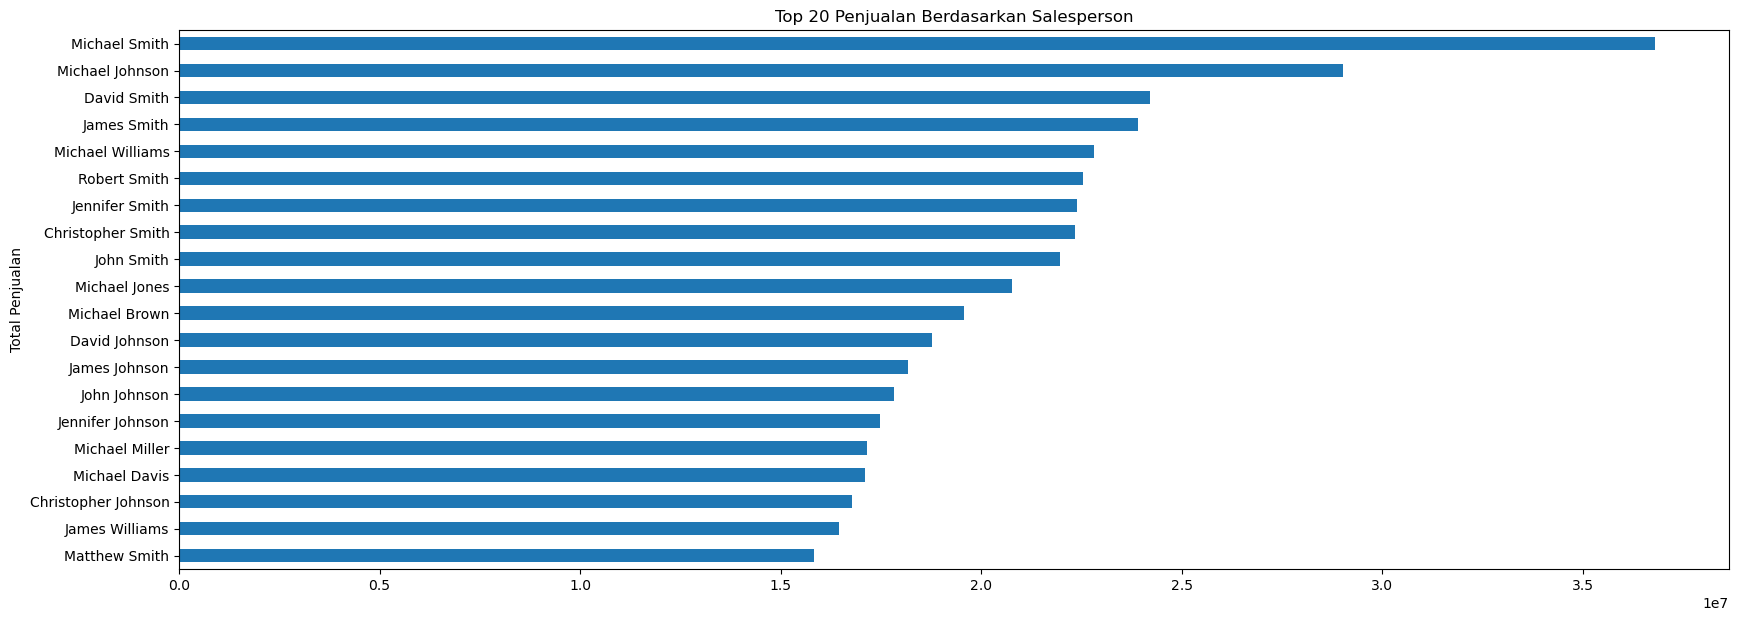

In [88]:
#Analisis penjualan berdasarkan top 20 perform Salesperson
top_salespersons = df.groupby('Salesperson')['Sale Price'].sum().sort_values(ascending=False).head(20).sort_values(ascending=True)
top_salespersons.plot(kind='barh')
plt.title('Top 20 Penjualan Berdasarkan Salesperson')
plt.ylabel('Total Penjualan')
plt.show()

In [73]:
#Top 5 Salesperson berdasarkan Jumlah terjual
top_salespersons = df['Salesperson'].value_counts().head(5)
print(top_salespersons)

Michael Smith      1229
Michael Johnson     976
David Smith         821
James Smith         796
Jennifer Smith      753
Name: Salesperson, dtype: int64


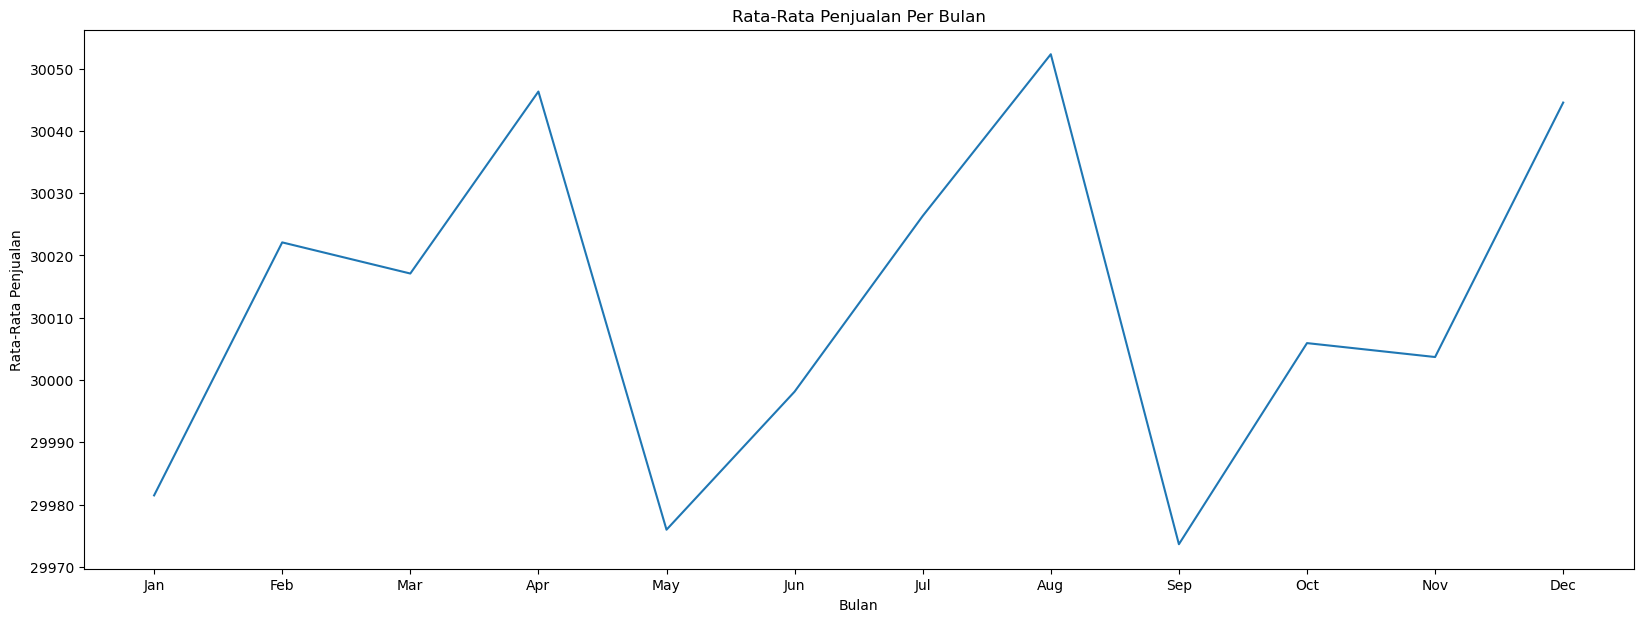

In [74]:
#Tren Penjualan Sepanjang Waktu Berdasarkan Bulan
average_sales_by_month = df.groupby('Month')['Sale Price'].mean()
average_sales_by_month.plot(kind='line')
plt.title('Rata-Rata Penjualan Per Bulan')
plt.ylabel('Rata-Rata Penjualan')
plt.xlabel('Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

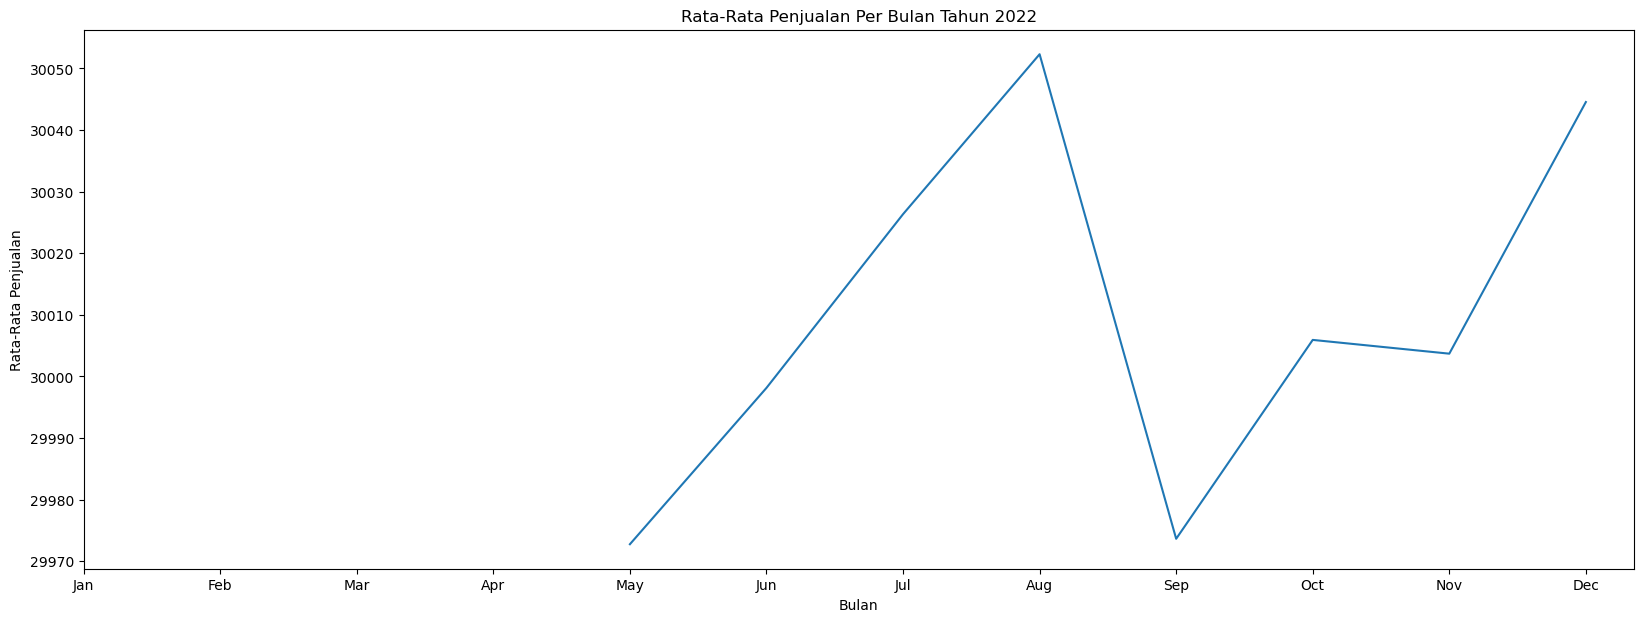

In [75]:
# Filter dataframe untuk tahun 2022
df_2022 = df[df['Year'] == 2022]
average_sales_by_month_2022 = df_2022.groupby('Month')['Sale Price'].mean()

# Plot untuk tahun 2022
average_sales_by_month_2022.plot(kind='line')
plt.title('Rata-Rata Penjualan Per Bulan Tahun 2022')
plt.ylabel('Rata-Rata Penjualan')
plt.xlabel('Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

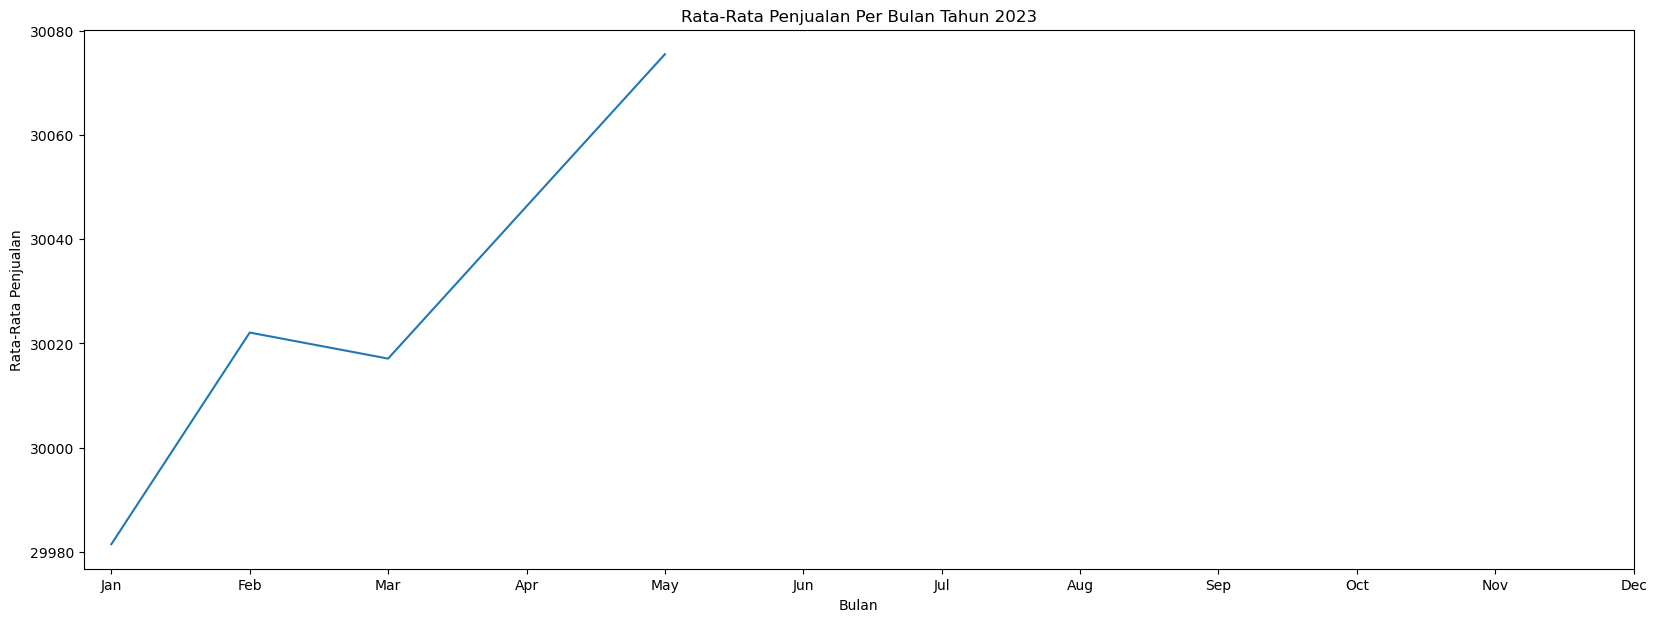

In [76]:
# Filter dataframe untuk tahun 2023
df_2023 = df[df['Year'] == 2023]
average_sales_by_month_2023 = df_2023.groupby('Month')['Sale Price'].mean()

# Plot untuk tahun 2023
average_sales_by_month_2023.plot(kind='line')
plt.title('Rata-Rata Penjualan Per Bulan Tahun 2023')
plt.ylabel('Rata-Rata Penjualan')
plt.xlabel('Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [77]:
df['Year'].unique()

array([2022, 2023], dtype=int64)

In [78]:
df

,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month,Year
0,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.07,1126.73,8,2022
1,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.13,5172.40,3,2023
2,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.11,3818.63,4,2023
3,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.09,3866.20,9,2022
4,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.11,2298.85,6,2022
...,...,...,...,...,...,...,...,...,...,...
2499995,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.06,3137.70,5,2022
2499996,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.07,1284.97,10,2022
2499997,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.09,2744.19,6,2022
2499998,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.09,2305.80,2,2023


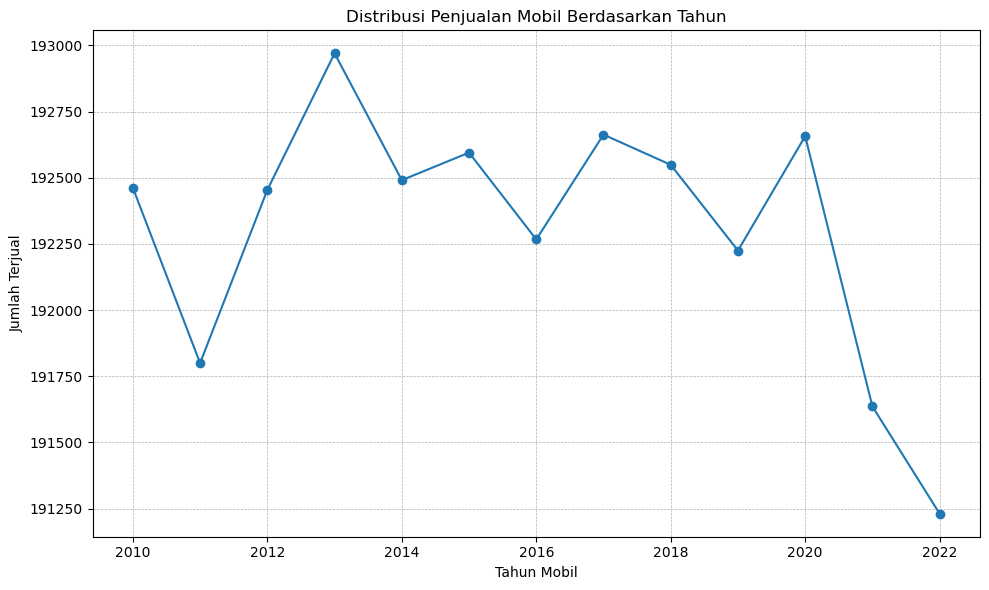

In [79]:
#Analisis Tren berdasarkan tahun pembuatan mobil
car_year = df.groupby('Car Year')['Car Make'].count()
car_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Distribusi Penjualan Mobil Berdasarkan Tahun')
plt.xlabel('Tahun Mobil')
plt.ylabel('Jumlah Terjual')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


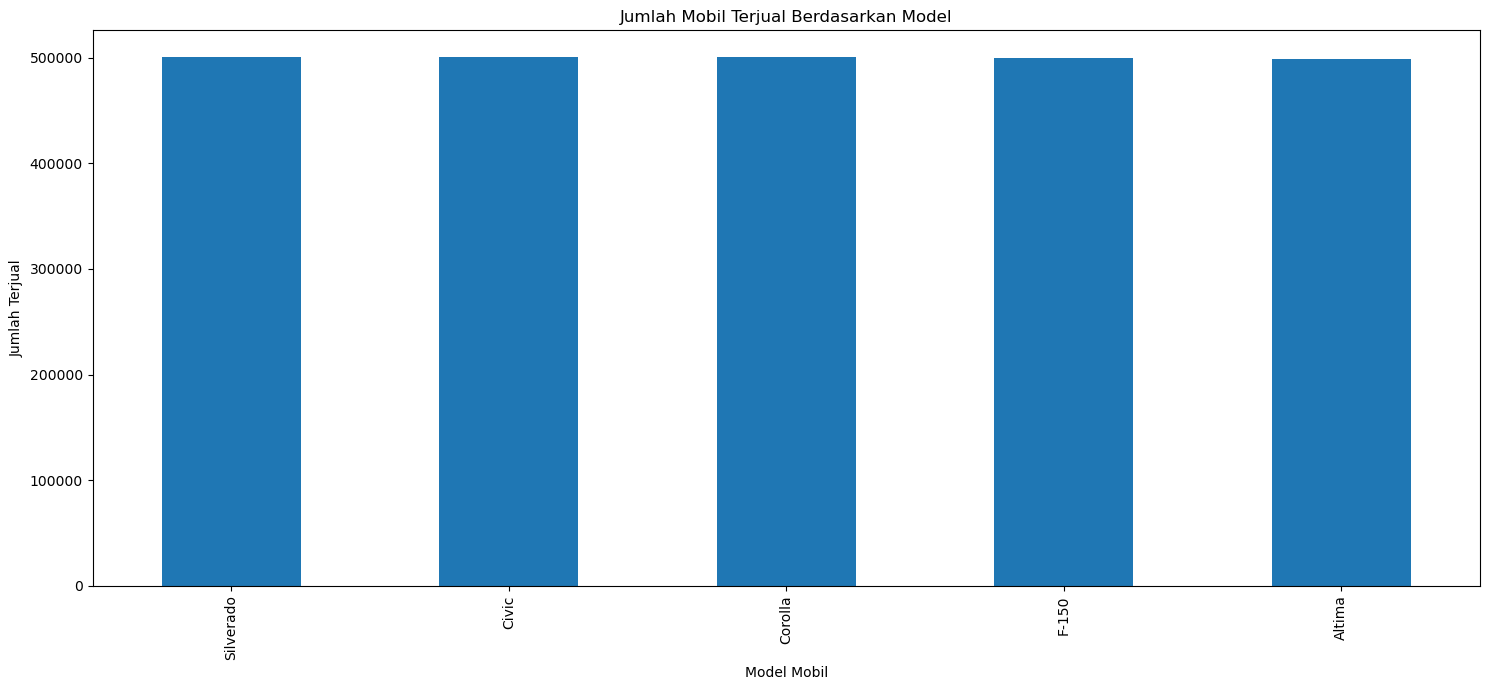

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
dtype: int64
Model dengan penjualan terbanyak adalah Silverado


In [80]:
#Analisis Jumlah Mobil Terjual Berdasarkan Model
count_cars_sold = df.groupby('Car Model').size().sort_values(ascending=False)
count_cars_sold.plot(kind='bar', figsize=(15, 7))
plt.title('Jumlah Mobil Terjual Berdasarkan Model')
plt.ylabel('Jumlah Terjual')
plt.xlabel('Model Mobil')
plt.tight_layout()  
plt.show()
print(count_cars_sold)
print("Model dengan penjualan terbanyak adalah",df['Car Model'].value_counts().idxmax())

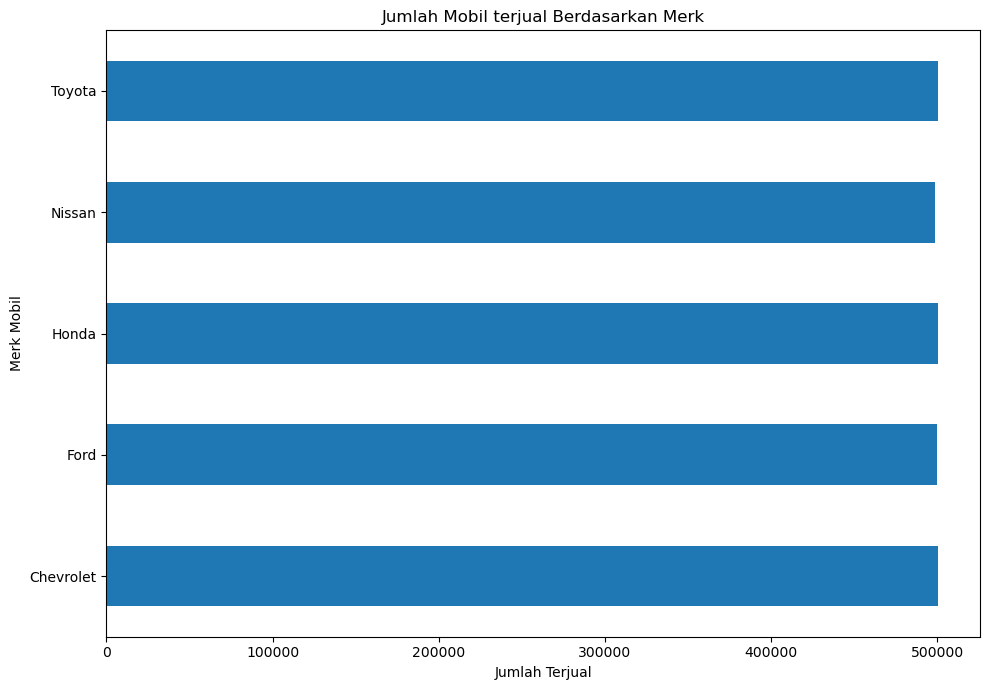

Car Make
Chevrolet    500455
Ford         499781
Honda        500687
Nissan       498930
Toyota       500147
dtype: int64
Merk dengan penjualan terbanyak adalah Honda


In [81]:
# Menghitung jumlah mobil terjual untuk setiap Merk
count_cars_sold = df.groupby('Car Make').size()
count_cars_sold.plot(kind='barh', figsize=(10, 7))
plt.title('Jumlah Mobil terjual Berdasarkan Merk')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Merk Mobil')
plt.tight_layout()  
plt.show()
print(count_cars_sold)
print("Merk dengan penjualan terbanyak adalah",df['Car Make'].value_counts().idxmax())

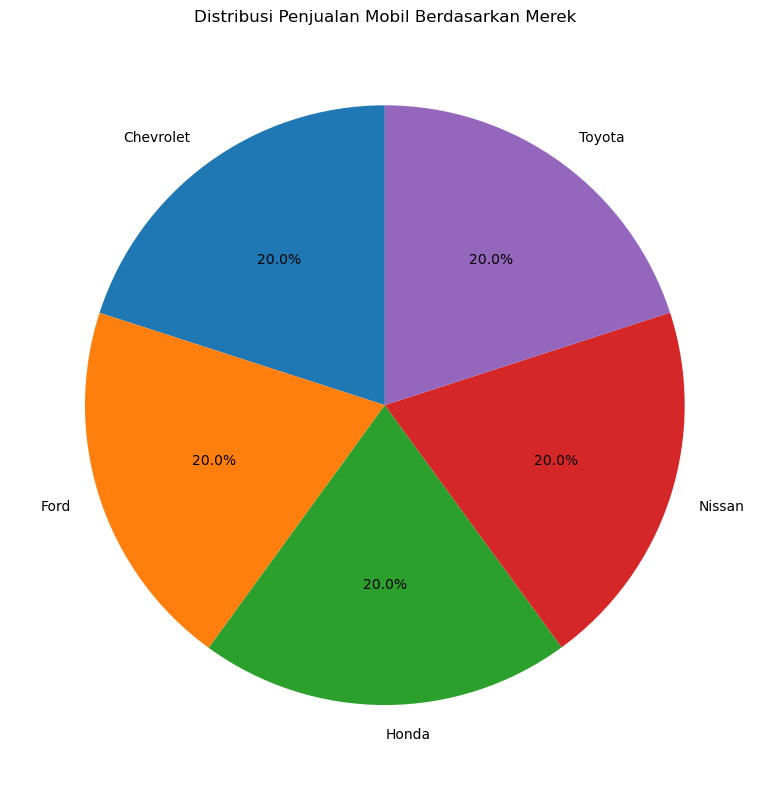

In [82]:
#Menampilkan distribusi mobil berdasarkan merk
car_make_counts = df.groupby('Car Make').size()
car_make_counts.plot(kind='pie', figsize=(10, 8), autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Penjualan Mobil Berdasarkan Merek')
plt.ylabel('')
plt.tight_layout()
plt.show()

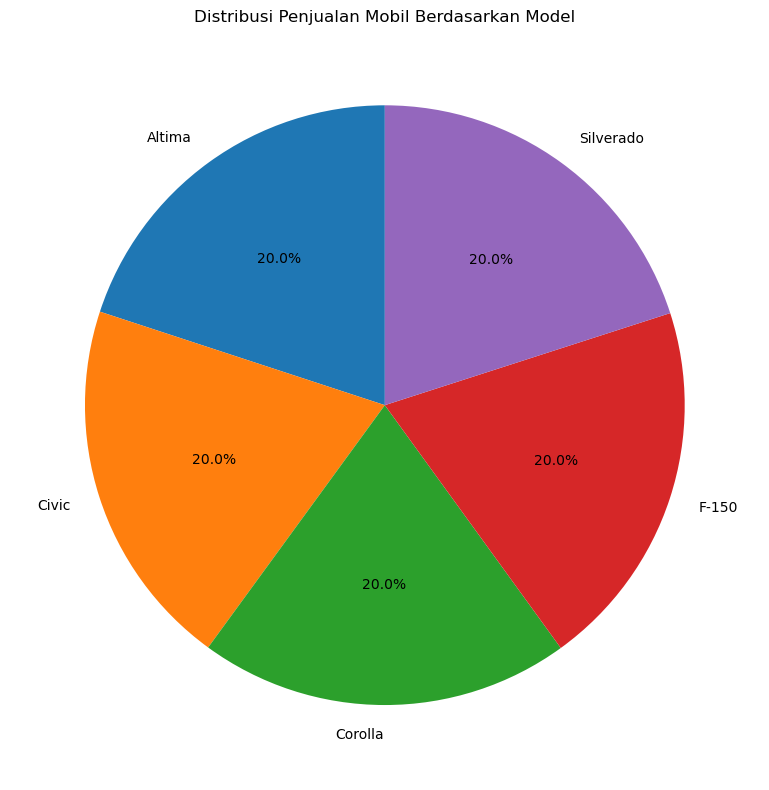

In [83]:
#Menampilkan distribusi mobil berdasarkan model
car_make_counts = df.groupby('Car Model').size()
car_make_counts.plot(kind='pie', figsize=(10, 8), autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Penjualan Mobil Berdasarkan Model')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [84]:
#Matriks korelasi
df.corr()

,Car Year,Sale Price,Commission Rate,Commission Earned,Month,Year
Car Year,1.00,-0.00,-0.00,-0.00,-0.00,0.00
Sale Price,-0.00,1.00,0.00,0.78,0.00,0.00
Commission Rate,-0.00,0.00,1.00,0.59,-0.00,-0.00
Commission Earned,-0.00,0.78,0.59,1.00,0.00,0.00
Month,-0.00,0.00,-0.00,0.00,1.00,-0.82
Year,0.00,0.00,-0.00,0.00,-0.82,1.00


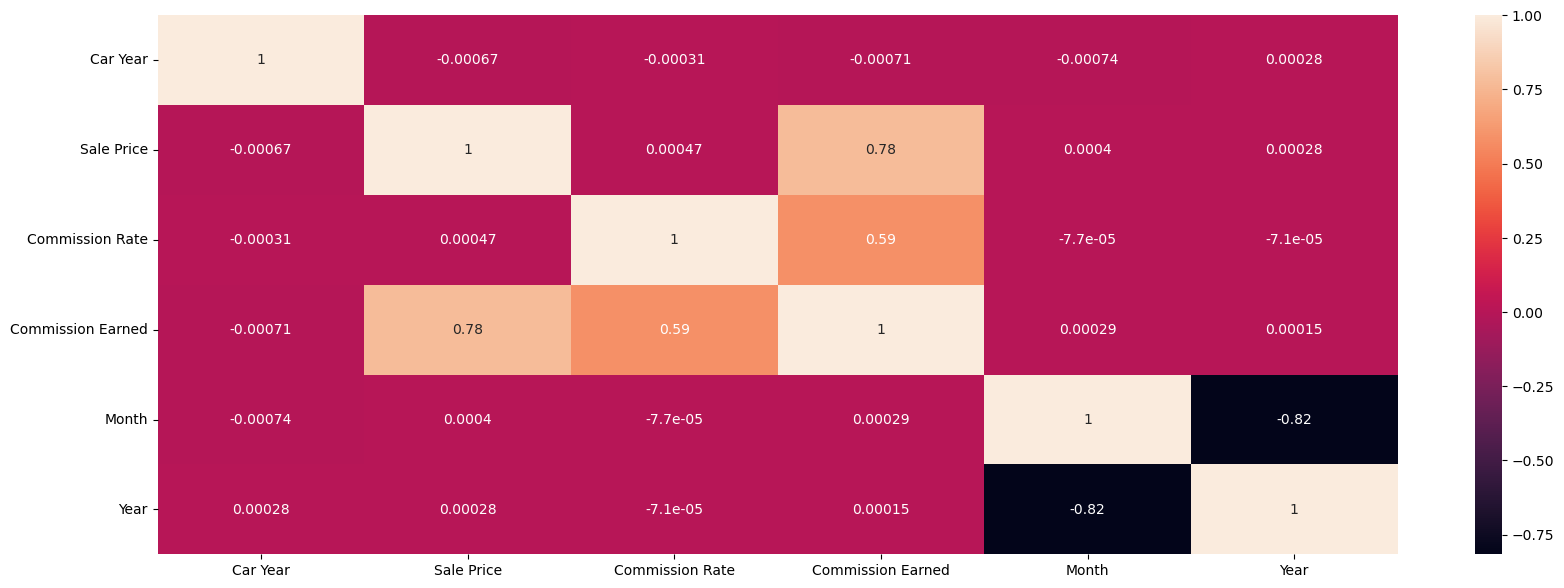

In [85]:
sns.heatmap(df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()